In [13]:
import pygrib
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import random
from collections import defaultdict

In [15]:
import os
import datetime

start_str = "2002010100"
end_str = "2013072423"

start_time = datetime.datetime.strptime(start_str, "%Y%m%d%H")
end_time = datetime.datetime.strptime(end_str, "%Y%m%d%H")

directory = "/N/project/Zli_lab/Data/Observations/stage4_jja_processed"

files_set = set(os.listdir(directory))

missing_files = []

current_time = start_time
while current_time <= end_time:
    if current_time.month in [5, 6, 7, 8, 9]:
        file_name = f"ST4.{current_time.strftime('%Y%m%d%H')}.01h"
        if file_name not in files_set:
            missing_files.append(file_name)
    current_time += datetime.timedelta(hours=1)

if missing_files:
    print("missing file:")
    for f in missing_files:
        print(f)
else:
    print("you good")


missing file:
ST4.2003071123.01h
ST4.2003071200.01h
ST4.2003071201.01h
ST4.2003071202.01h
ST4.2003071203.01h
ST4.2003071204.01h
ST4.2003071205.01h
ST4.2003071206.01h
ST4.2003082619.01h
ST4.2003082620.01h
ST4.2003082621.01h
ST4.2003082622.01h
ST4.2003082623.01h
ST4.2003082700.01h


In [12]:
import os
import datetime

start_str = "2020072000"
end_str   = "2024093023"

start_time = datetime.datetime.strptime(start_str, "%Y%m%d%H")
end_time   = datetime.datetime.strptime(end_str, "%Y%m%d%H")

directory = "/N/project/Zli_lab/Data/Observations/stage4_jja_processed"

files_set = set(os.listdir(directory))

missing_files = []

current_time = start_time
while current_time <= end_time:
    if current_time.month in [5, 6, 7, 8, 9]:
        file_name = f"st4_conus.{current_time.strftime('%Y%m%d%H')}.01h.grb2"
        if file_name not in files_set:
            missing_files.append(file_name)
    current_time += datetime.timedelta(hours=1)

if missing_files:
    print("Missing st4_conus files:")
    for f in missing_files:
        print(f)
else:
    print("you good")


you good


In [5]:
(31+30+31+31+30)*23*24

84456

In [53]:
grb_file = "/N/project/Zli_lab/Data/Observations/stage4_uncompress/ST4.2002021404.01h"

In [54]:
grbs = pygrib.open(grb_file)
variables = set(grb.name for grb in grbs)
grbs.close()
print("Available variables:", variables)



Available variables: {'Total Precipitation'}


In [55]:
grbs = pygrib.open(grb_file)
for grb in grbs:
    print(grb)
selected_grb = grbs.select(name="Total Precipitation")[0]
print(selected_grb)
data, lat, lon = selected_grb.data()
grbs.close()
print(f"Data shape: {data.shape}, Lat shape: {lat.shape}, Lon shape: {lon.shape}")

1:Total Precipitation:kg m**-2 (accum):polar_stereographic:surface:level 0:fcst time 0-1 hrs (accum):from 200202140300
1:Total Precipitation:kg m**-2 (accum):polar_stereographic:surface:level 0:fcst time 0-1 hrs (accum):from 200202140300
Data shape: (881, 1121), Lat shape: (881, 1121), Lon shape: (881, 1121)


In [27]:
# 提取数据
data, lat, lon = selected_grb.data()

In [28]:
data.shape

(881, 1121)

In [ ]:
grb_file = "/N/project/Zli_lab/Data/Observations/stage4_jja_processed/st4_conus.2022093023.01h.grb2"

In [3]:
grbs = pygrib.open(grb_file)
for grb in grbs:
    print(grb)
selected_grb = grbs.select(name="Total Precipitation")[0]
print(selected_grb)
data, lat, lon = selected_grb.data()
grbs.close()
print(f"Data shape: {data.shape}, Lat shape: {lat.shape}, Lon shape: {lon.shape}")


1:Total Precipitation:kg m**-2 (accum):polar_stereographic:surface:level 0:fcst time 0-1 hrs (accum):from 202209302200
1:Total Precipitation:kg m**-2 (accum):polar_stereographic:surface:level 0:fcst time 0-1 hrs (accum):from 202209302200
Data shape: (881, 1121), Lat shape: (881, 1121), Lon shape: (881, 1121)


In [4]:
# 列出文件中所有变量
for grb in grbs:
    print(grb)

In [29]:
# 提取数据
data, lat, lon = selected_grb.data()

In [30]:
data

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=9999.0)

In [31]:
import numpy as np

# 假设你的数据是 masked_array
array_2d = data.filled(np.nan)  # 用 NaN 填充被屏蔽的值
print(array_2d)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


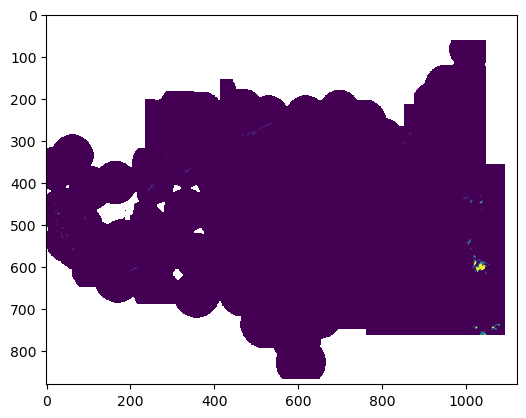

In [33]:
plt.imshow(np.flip(array_2d,axis=0),vmax=5)

In [9]:
import xarray as xr
import numpy as np

# 获取维度大小
lat_dim, lon_dim = data.shape

# 创建 xarray.Dataset
ds = xr.Dataset(
    {
        "p": (["lat", "lon"], data),  # 数据变量
    },
    coords={
        "lat": (["lat", "lon"], lat),  # 维度：纬度
        "lon": (["lat", "lon"], lon),  # 维度：经度
    }
)



In [10]:
ds

<xarray.Dataset> Size: 24MB
Dimensions:  (lat: 881, lon: 1121)
Coordinates:
    lat      (lat, lon) float64 8MB 23.12 23.12 23.13 ... 45.68 45.65 45.62
    lon      (lat, lon) float64 8MB -119.0 -119.0 -119.0 ... -60.04 -60.0 -59.96
Data variables:
    p        (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan

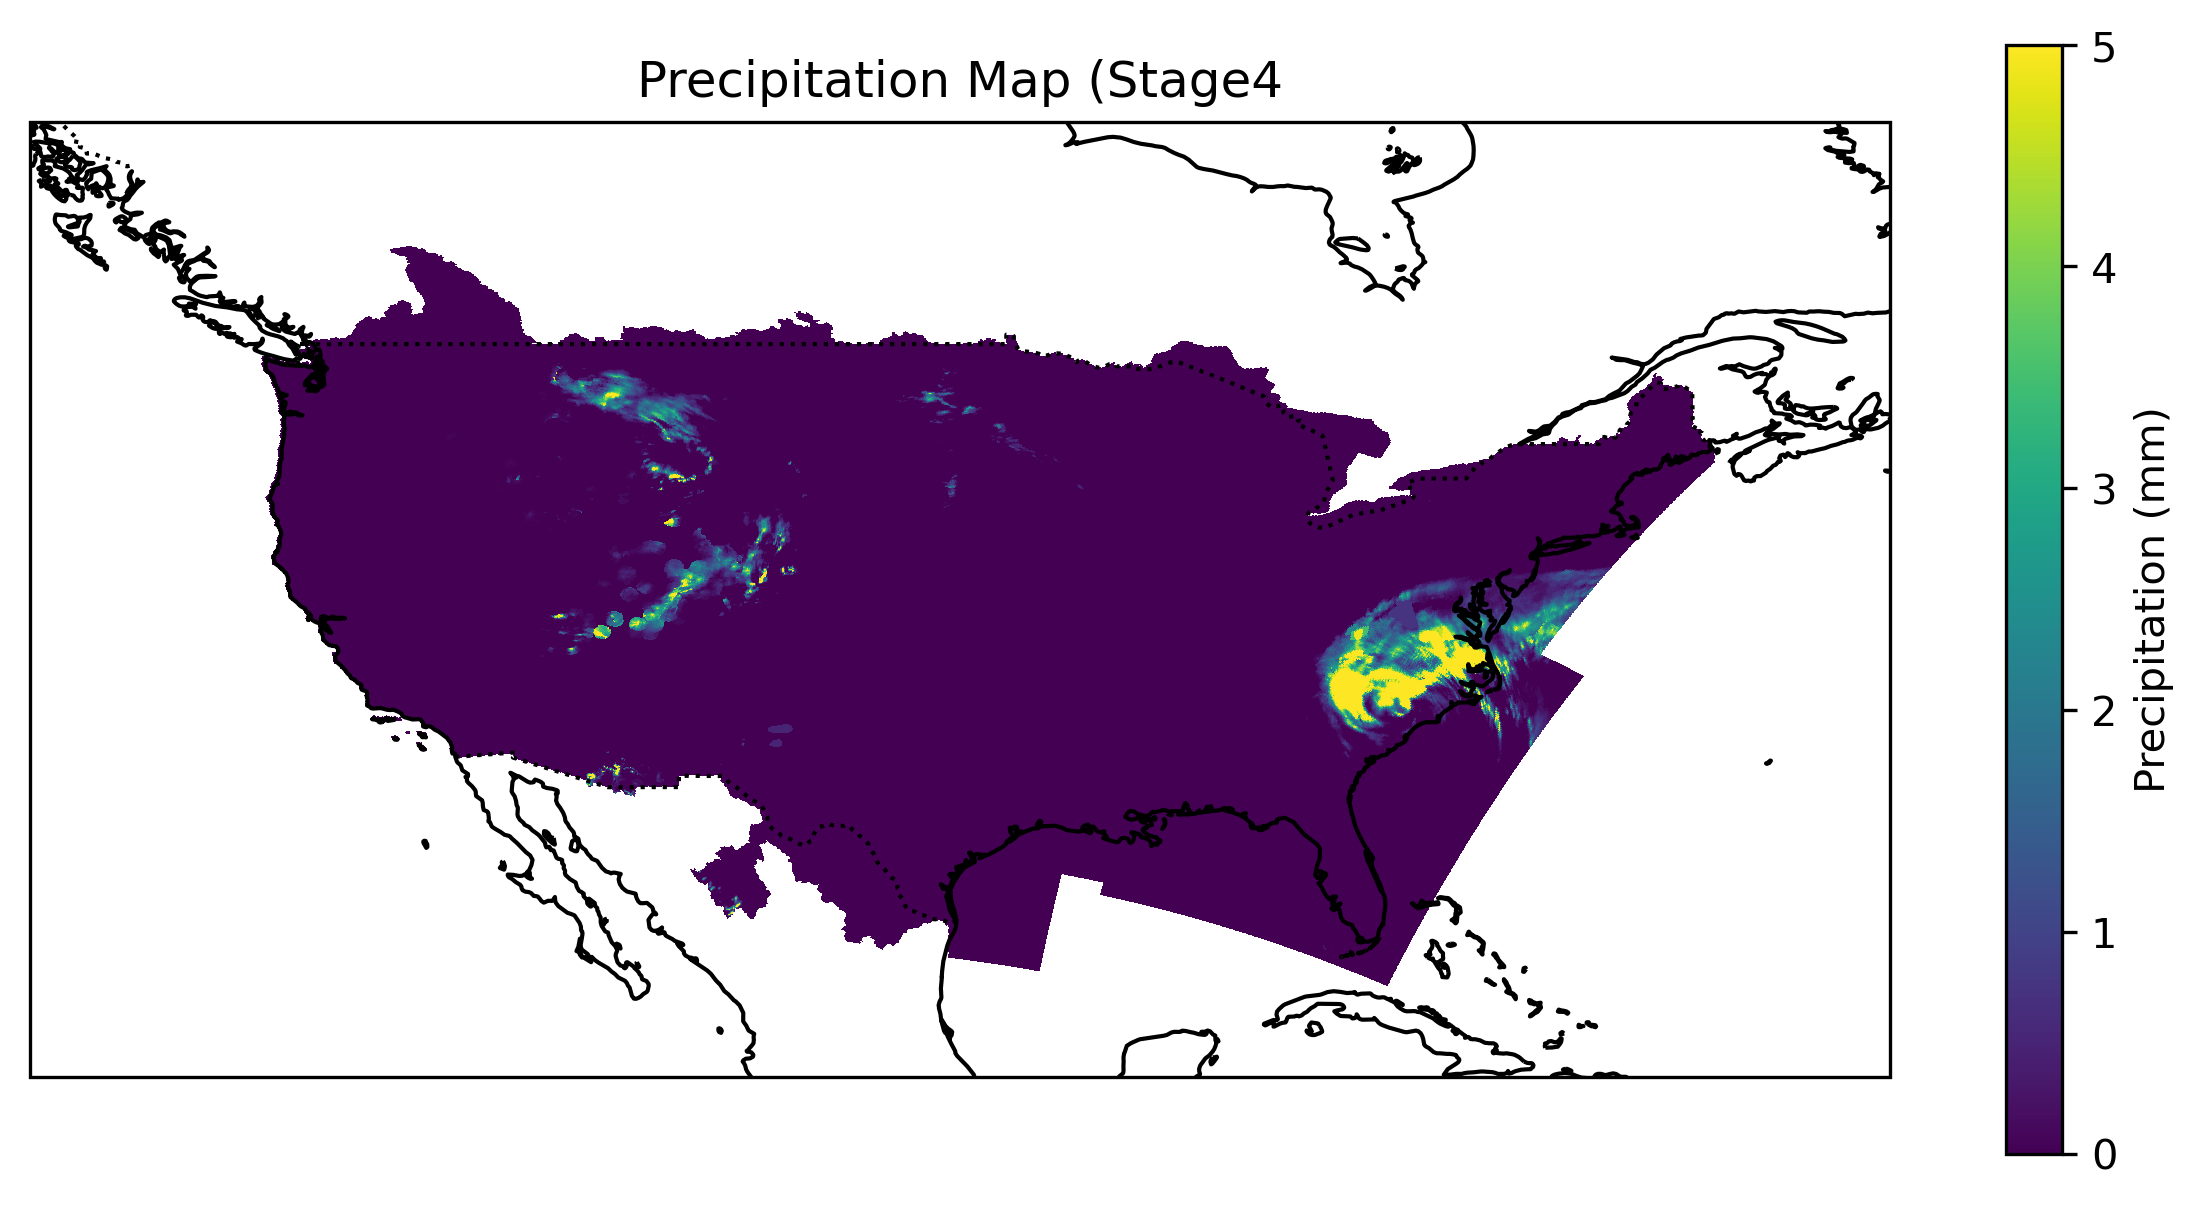

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 读取数据（假设 ds 已经创建）
# ds = xr.open_dataset("output.nc")  # 如果数据已保存为 NetCDF

# 设置投影（PlateCarree 是常见的经纬度投影）
projection = ccrs.PlateCarree()

# 创建绘图
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": projection}, dpi=300)

# 添加地图要素（国家、海岸线）
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# 绘制降水数据（使用 pcolormesh）
pcm = ax.pcolormesh(
    ds["lon"], ds["lat"], ds["p"],
    transform=ccrs.PlateCarree(),
    shading="auto",vmax=5
)

# 添加颜色条
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", shrink=0.8)
cbar.set_label("Precipitation (mm)")

# 添加标题
ax.set_title("Precipitation Map (Stage4")

# 显示图像
plt.show()
